### Introducing the Dataset

For this project, a credit card data set from [kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata) will be analyzed and clustered to see what underlying trends exist in the data.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
cc_data = pd.read_csv('C:\\cc_data.csv')
cc_data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

Before getting into visualization and cleaning, column names must be explained.

- CUST_ID: customer ID number of the credit card holder
- BALANCE: Account balance available for purchases
- BALANCE_FREQUENCY: How frequently the BALANCE is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Total amount charged to card from purchases
- ONEOFF_PURCHASES : Maximum purchase amount done at once
- INSTALLMENTS_PURCHASES : Amount of purchase paid in installment
- CASH_ADVANCE : Cash advance given to the card holder
- PURCHASES_FREQUENCY : How frequently purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently one-off purchases are happening (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently cash advances are being made
- CASHADVANCETRX : Number of Transactions made with cash advances
- PURCHASES_TRX : Number of purchases made
- CREDIT_LIMIT : Credit limit for the card holder
- PAYMENTS : Amount of payment made by the card holder
- MINIMUM_PAYMENTS : Minimum amount of payments made by card holder
- PRCFULLPAYMENT : Percentage of full payment paid by card holder
- TENURE : Number of months a customer has been a card holder

### Data Exploration and Visualization

Now that the dataset has been introducted and the columns have been explained, it is time to fill in any missing values and visualize the data.

In [3]:
print(cc_data.shape)
cc_data.isnull().sum()

(8950, 18)


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
cc_data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

The `describe` call above shows us that there are many outliers in the dataset. This is unsurprising, as we are dealing with real credit card data, but it will affect the strategy for filling missing values. Using the mean is often a good way of dealing with missing values, but here it would likely be inaccurate since the mean is so much higher than the median. For this reason, we will use the median to fill the missing values in `MINIMUM_PAYMENTS` and `CREDIT_LIMIT`.

In [5]:
cc_data['MINIMUM_PAYMENTS'].fillna(cc_data['MINIMUM_PAYMENTS'].median(), inplace=True)
cc_data['CREDIT_LIMIT'].fillna(cc_data['CREDIT_LIMIT'].median(), inplace=True)
cc_data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Now that missing values have been dealt with, it is time to do data visualization.

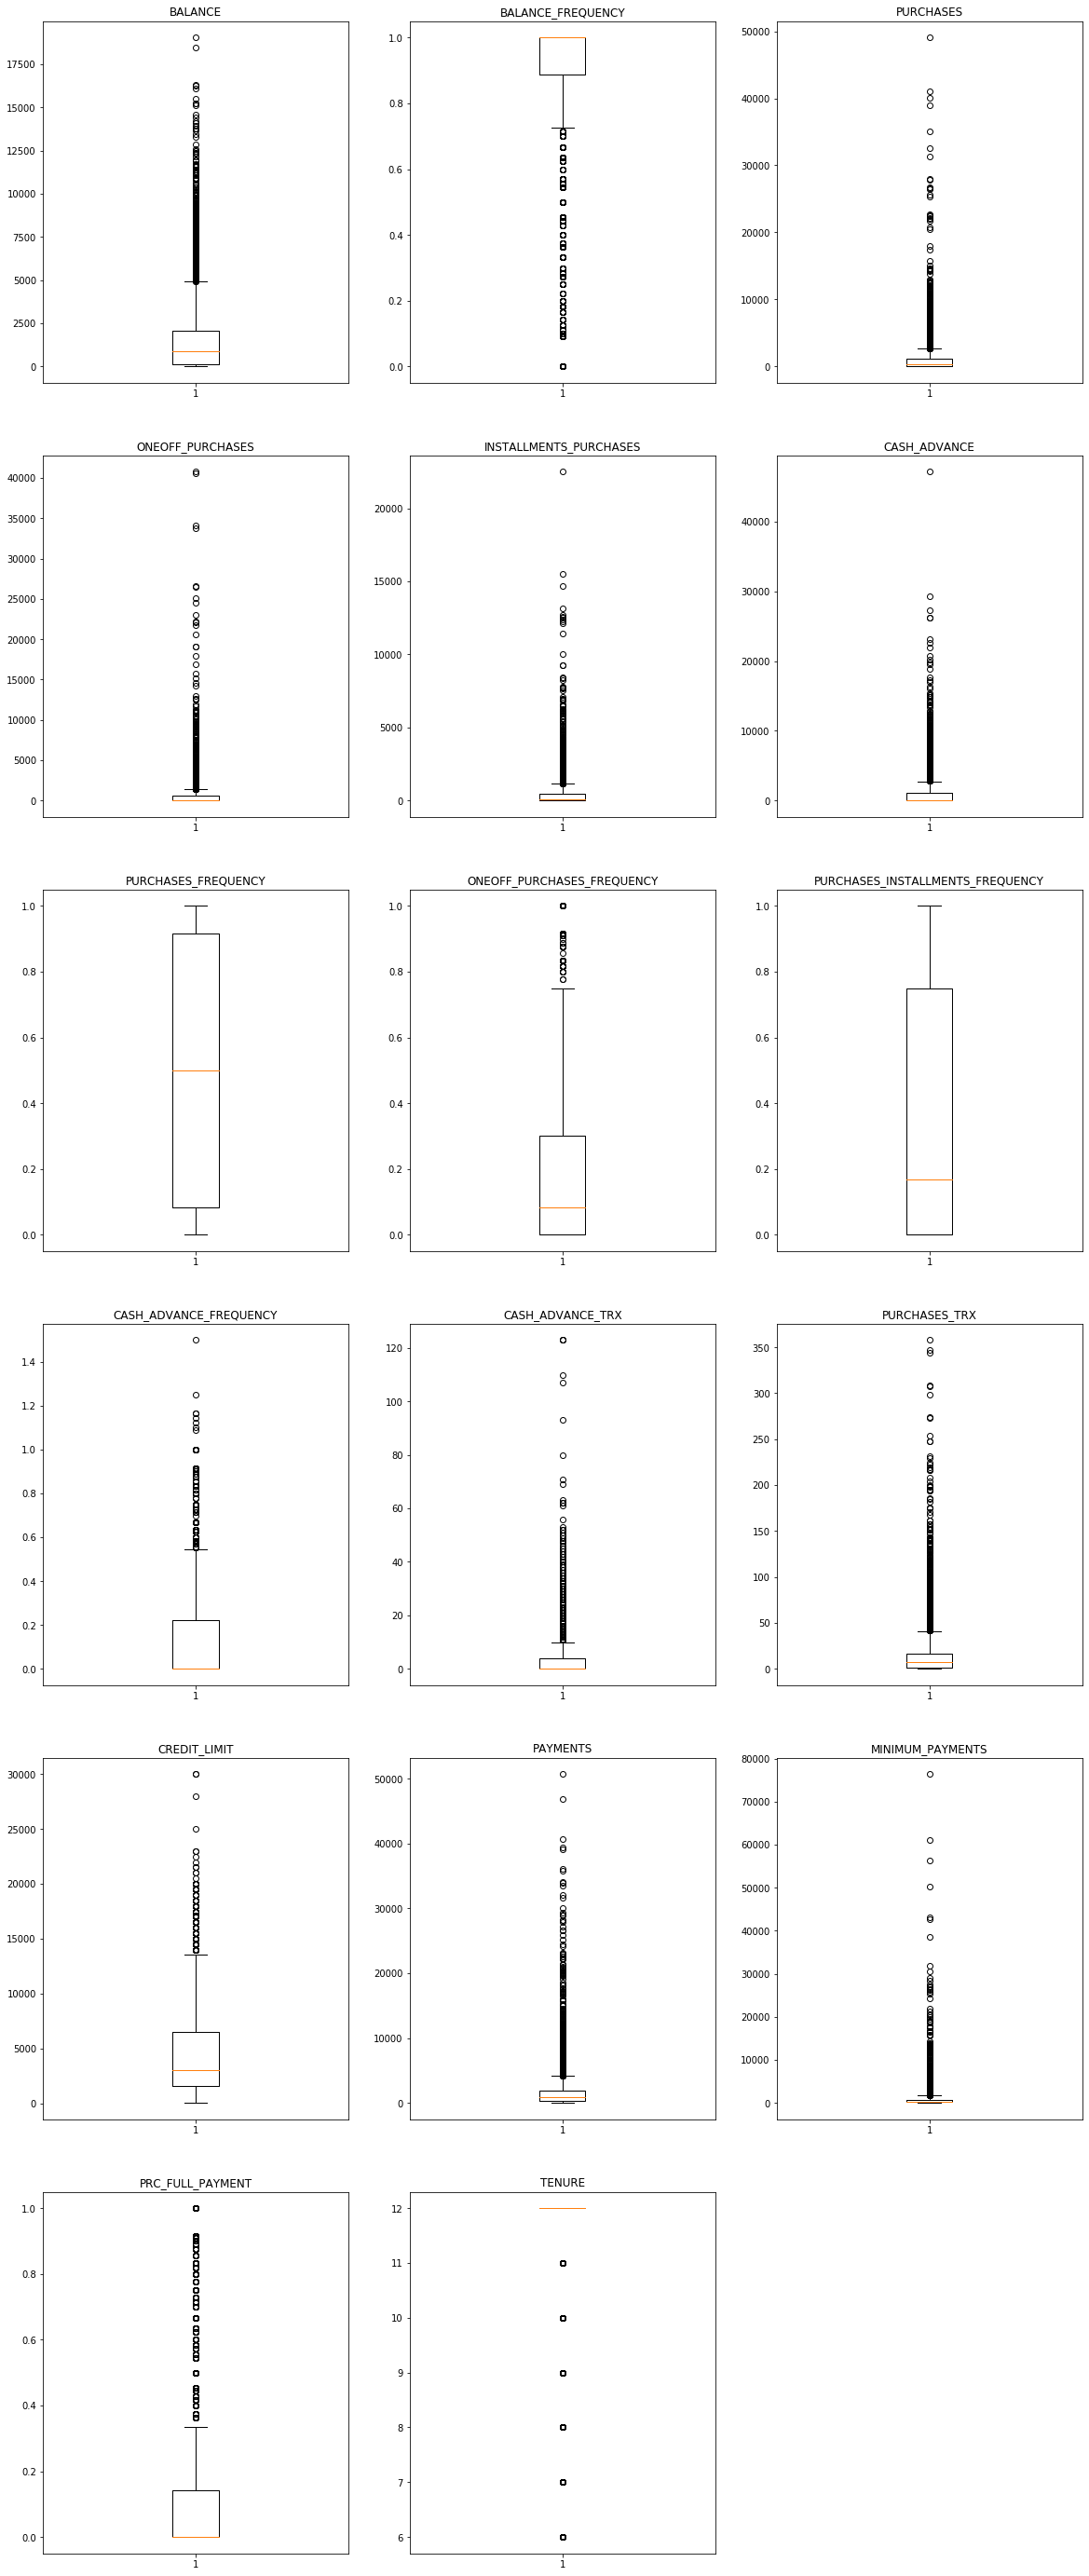

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,50))

columns = cc_data.columns[1:]
for i in range(1,len(columns)+1):
    plt.subplot(6,3,i)
    plt.title(columns[i-1])
    plt.boxplot(cc_data[columns[i-1]])
    
plt.show();

As is clearly visible in the above graphs, many of the columns are riddled with outliers. Dropping the outliers is a poor choice because too much data would be lost. Winsorizing the outliers is an option, but may not be a good option because of the nature of the data. Since these are real datapoints from real credit card holders, winsorizing would reduce the amount of real information at our disposal. There are real cardholders who make huge one-off purchases, and there are real cardholders who are constantly asking for advances. It may be the case, that these outliers can be fitted into their own clusters. To create a baseline clustering for this data, DBSCAN will be implemented. Later, outlier reduction techniques will be applied to see if dealing with outliers improves clustering.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

X = cc_data.drop('CUST_ID', axis=1)
X.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        312.343947          0.000000      12  
4   678.334763        244.791237          0.000000      12

`CUST_ID` is dropped from the dataset because it tells us nothing about a given customer's habits.

In [8]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=4)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: -0.31989819624626076


DBSCAN has performed very poorly. Perhaps other clustering algorithms will perform better.

In [9]:
from sklearn.cluster import KMeans

clusters = 30
inertias = []
for i in range(1, clusters):
    kmean= KMeans(n_clusters = i, random_state = 123)
    kmean.fit(X)
    inertias.append(kmean.inertia_)

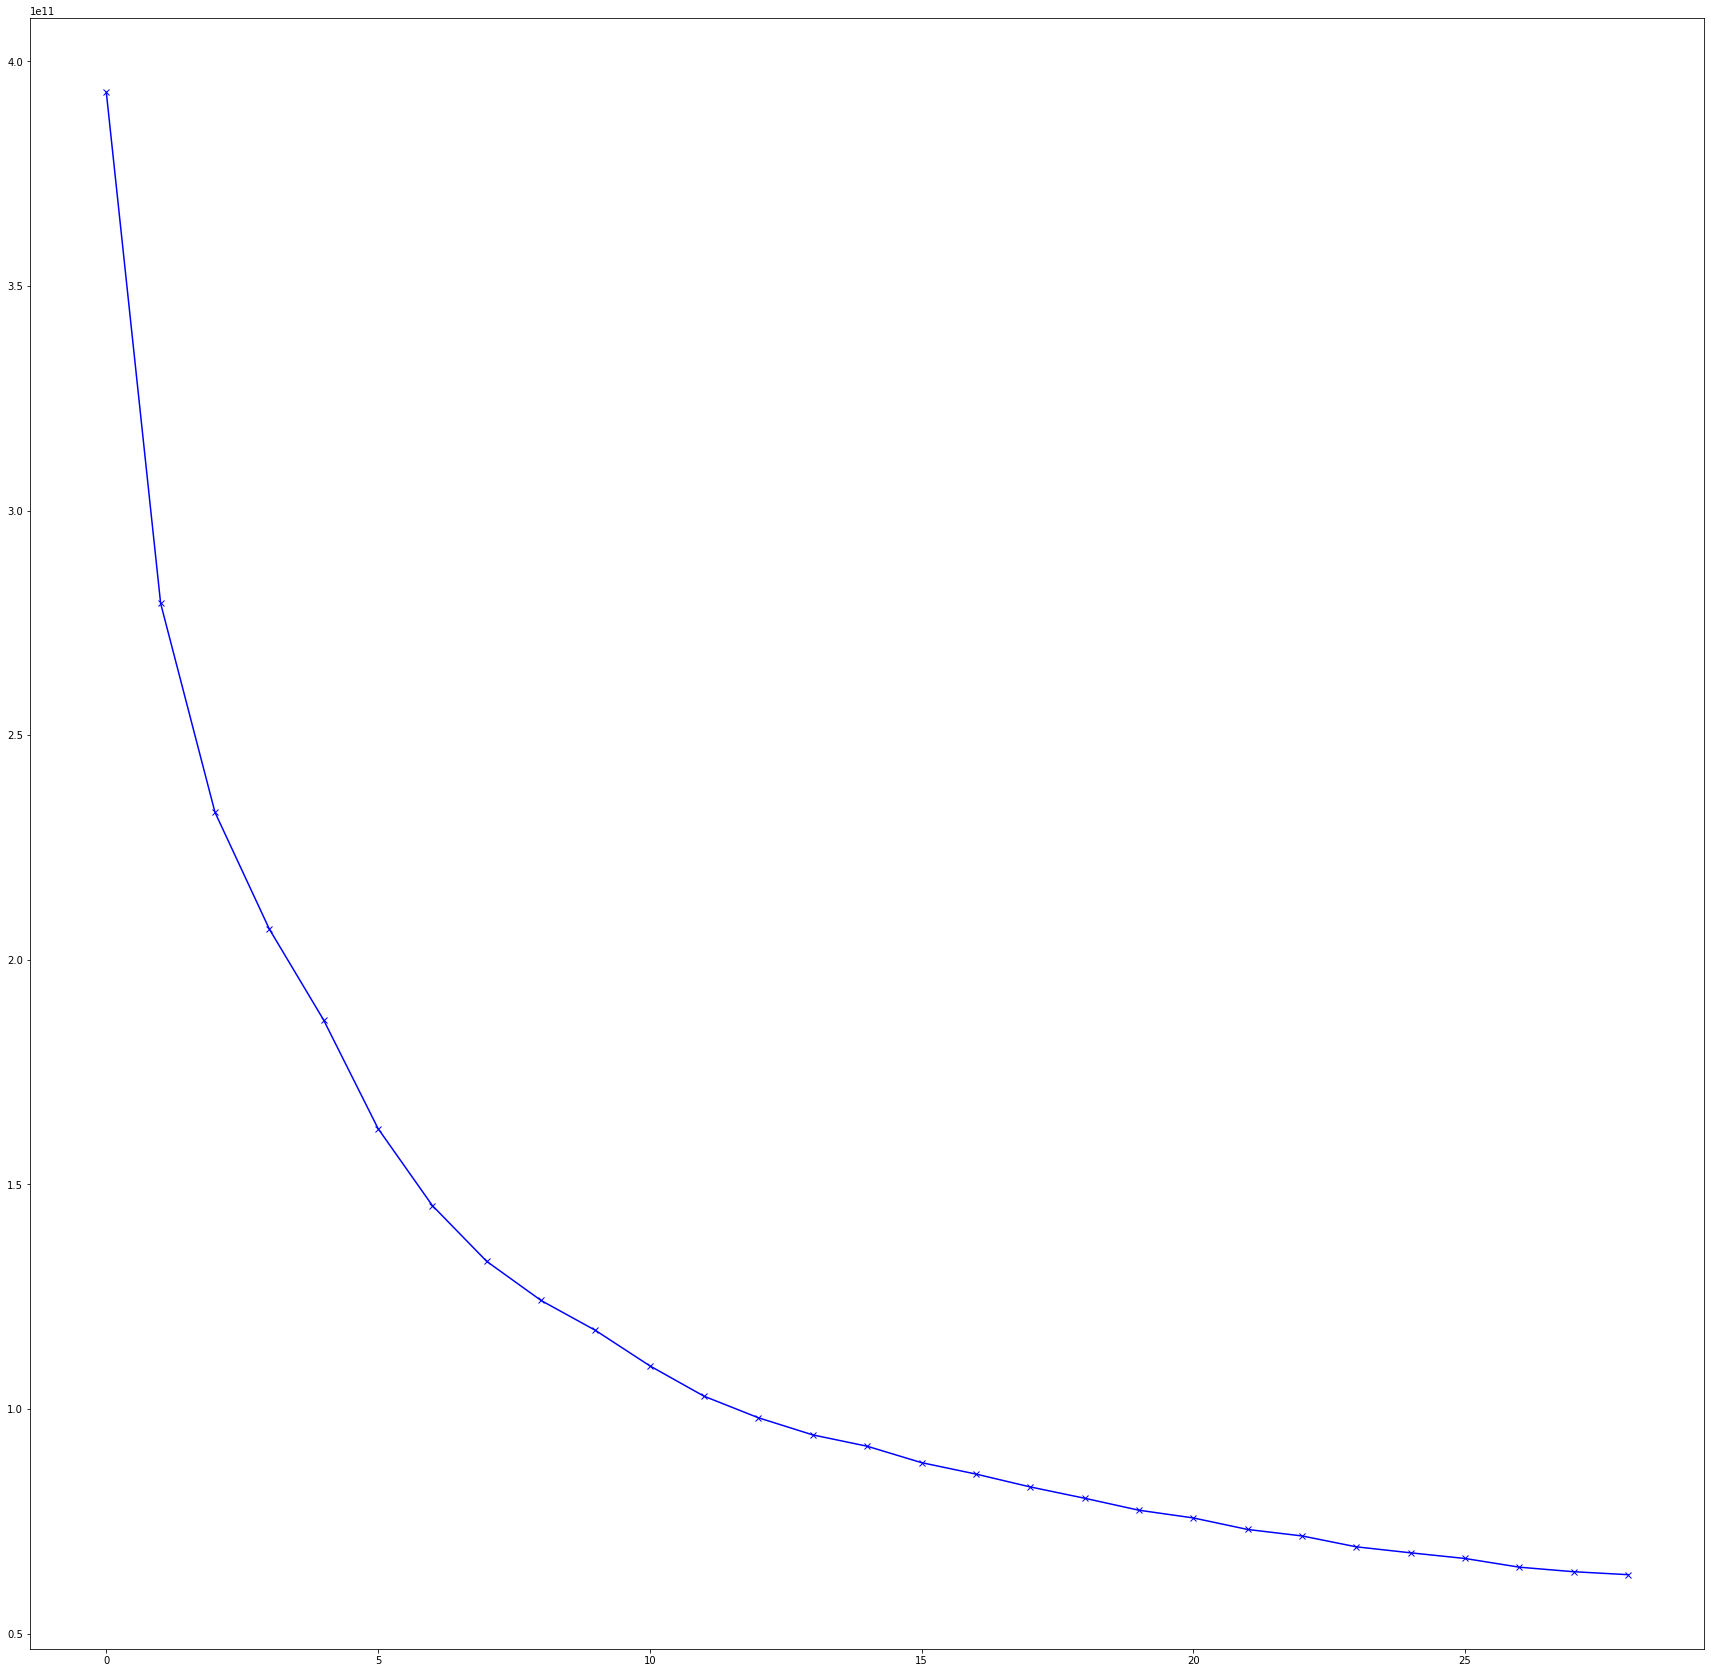

In [10]:
plt.figure(figsize = (30,30))
plt.plot(inertias, 'bx-')
plt.show();

From the elbow curve above, cluster values of 6, 7, and 8 look to be the best potential values.

In [49]:
cluster6 = KMeans(n_clusters=6, random_state=123).fit_predict(X_std)
cluster7 = KMeans(n_clusters=7, random_state=123).fit_predict(X_std)
cluster8 = KMeans(n_clusters=8, random_state=123).fit_predict(X_std)

print(metrics.silhouette_score(X_std, cluster6, metric='euclidean'))
print(metrics.silhouette_score(X_std, cluster7, metric='euclidean'))
print(metrics.silhouette_score(X_std, cluster8, metric='euclidean'))

0.20264545829419653
0.2148141481996436
0.2190910062534889


Thankfully, KMeans is performing better than the initial DBSCAN clustering. Each selected cluster value has a relatively similar silhouette score, although 8 clusters has the highest. It should again be noted that no outlier reduction techniques have been conducted on the dataset at this point; however, KMeans seems to be performing fairly well.

Next, GMM will be implemented and compared to both DBSCAN and KMeans.

In [12]:
# GMM TIME
from sklearn.mixture import GaussianMixture

cluster_scores = []

for i in range(2,20):
    gmm_cluster = GaussianMixture(n_components=i, random_state=123)
    clusters = gmm_cluster.fit_predict(X_std)
    cluster_scores.append(metrics.silhouette_score(X_std, clusters, metric='euclidean'))

In [13]:
for i in range(len(cluster_scores)):
    print(f'Silhouette score for {i+2} components: {cluster_scores[i]}')

Silhouette score for 2 components: 0.1962473002969001
Silhouette score for 3 components: 0.09779704526202775
Silhouette score for 4 components: 0.0974494121223488
Silhouette score for 5 components: 0.07116966655404822
Silhouette score for 6 components: 0.060169069933465345
Silhouette score for 7 components: 0.05028970771373451
Silhouette score for 8 components: 0.02814456817279915
Silhouette score for 9 components: 0.0023746840207382143
Silhouette score for 10 components: 0.017947484964768914
Silhouette score for 11 components: 0.025934300476535572
Silhouette score for 12 components: 0.005493026644626922
Silhouette score for 13 components: 0.013138973404082176
Silhouette score for 14 components: 0.00743571302833693
Silhouette score for 15 components: -0.03618922250136119
Silhouette score for 16 components: -0.0075931004837647385
Silhouette score for 17 components: 0.0028474080480714046
Silhouette score for 18 components: -0.0037109510652213427
Silhouette score for 19 components: -0.045

GMM performs best with just two components and then performs significantly worse after that point. Again, after an outlier strategy has been developed it may be beneficial to return to GMM to see if the algorithm performs better.

In [18]:
clustered8=pd.concat([X, pd.DataFrame({'cluster8':cluster8})], axis=1)
clustered7=pd.concat([X, pd.DataFrame({'cluster7':cluster7})], axis=1)
clustered6=pd.concat([X, pd.DataFrame({'cluster6':cluster6})], axis=1)
clustered8.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster8  
0   201.802084        139.509787          0.000000      12         1  
1  4103.032597       1072.340217          0.222222      12         7  
2   622.066742        627.284787          0.000000      12         4  
3     0.000000        312.343947          0.000000      12         1  
4   678.334763        244.791237          0.000000      12         1

In [14]:
# We just want the first two principal components
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X)

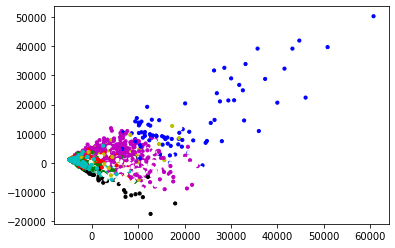

In [20]:
colors = ['b','g','r','c','m','y','k','w']
z = [colors[i] for i in clustered8.cluster8]

pca = PCA(n_components=2, copy=True, random_state=0)
transformed_data = pca.fit_transform(X)
x,y = transformed_data[:,0] , transformed_data[:,1]

plt.scatter(x,y,c=z, s=10)
plt.show();

PCA does not provide us a particularly clear visualization of the clusters, although it is apparent that the outliers are put into their own group.

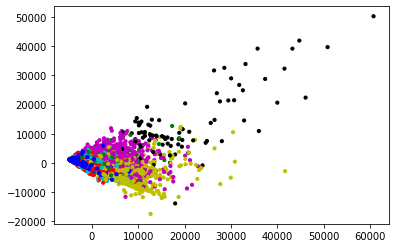

In [21]:
z = [colors[i] for i in clustered7.cluster7]

pca = PCA(n_components=2, copy=True, random_state=0)
transformed_data = pca.fit_transform(X)
x,y = transformed_data[:,0] , transformed_data[:,1]

plt.scatter(x,y,c=z, s=10)
plt.show();

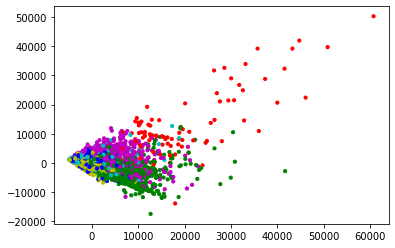

In [22]:
z = [colors[i] for i in clustered6.cluster6]

pca = PCA(n_components=2, copy=True, random_state=0)
transformed_data = pca.fit_transform(X)
x,y = transformed_data[:,0] , transformed_data[:,1]

plt.scatter(x,y,c=z, s=10)
plt.show();

In all three clustering options, PCA shows us that the clusters, with the exception of the cluster for outliers, are very close. In each clustering option, outliers are being grouped with one another, suggesting that employing outlier reduction techniques may reduce some of the clustering accuracy.

<Figure size 2160x2160 with 0 Axes>

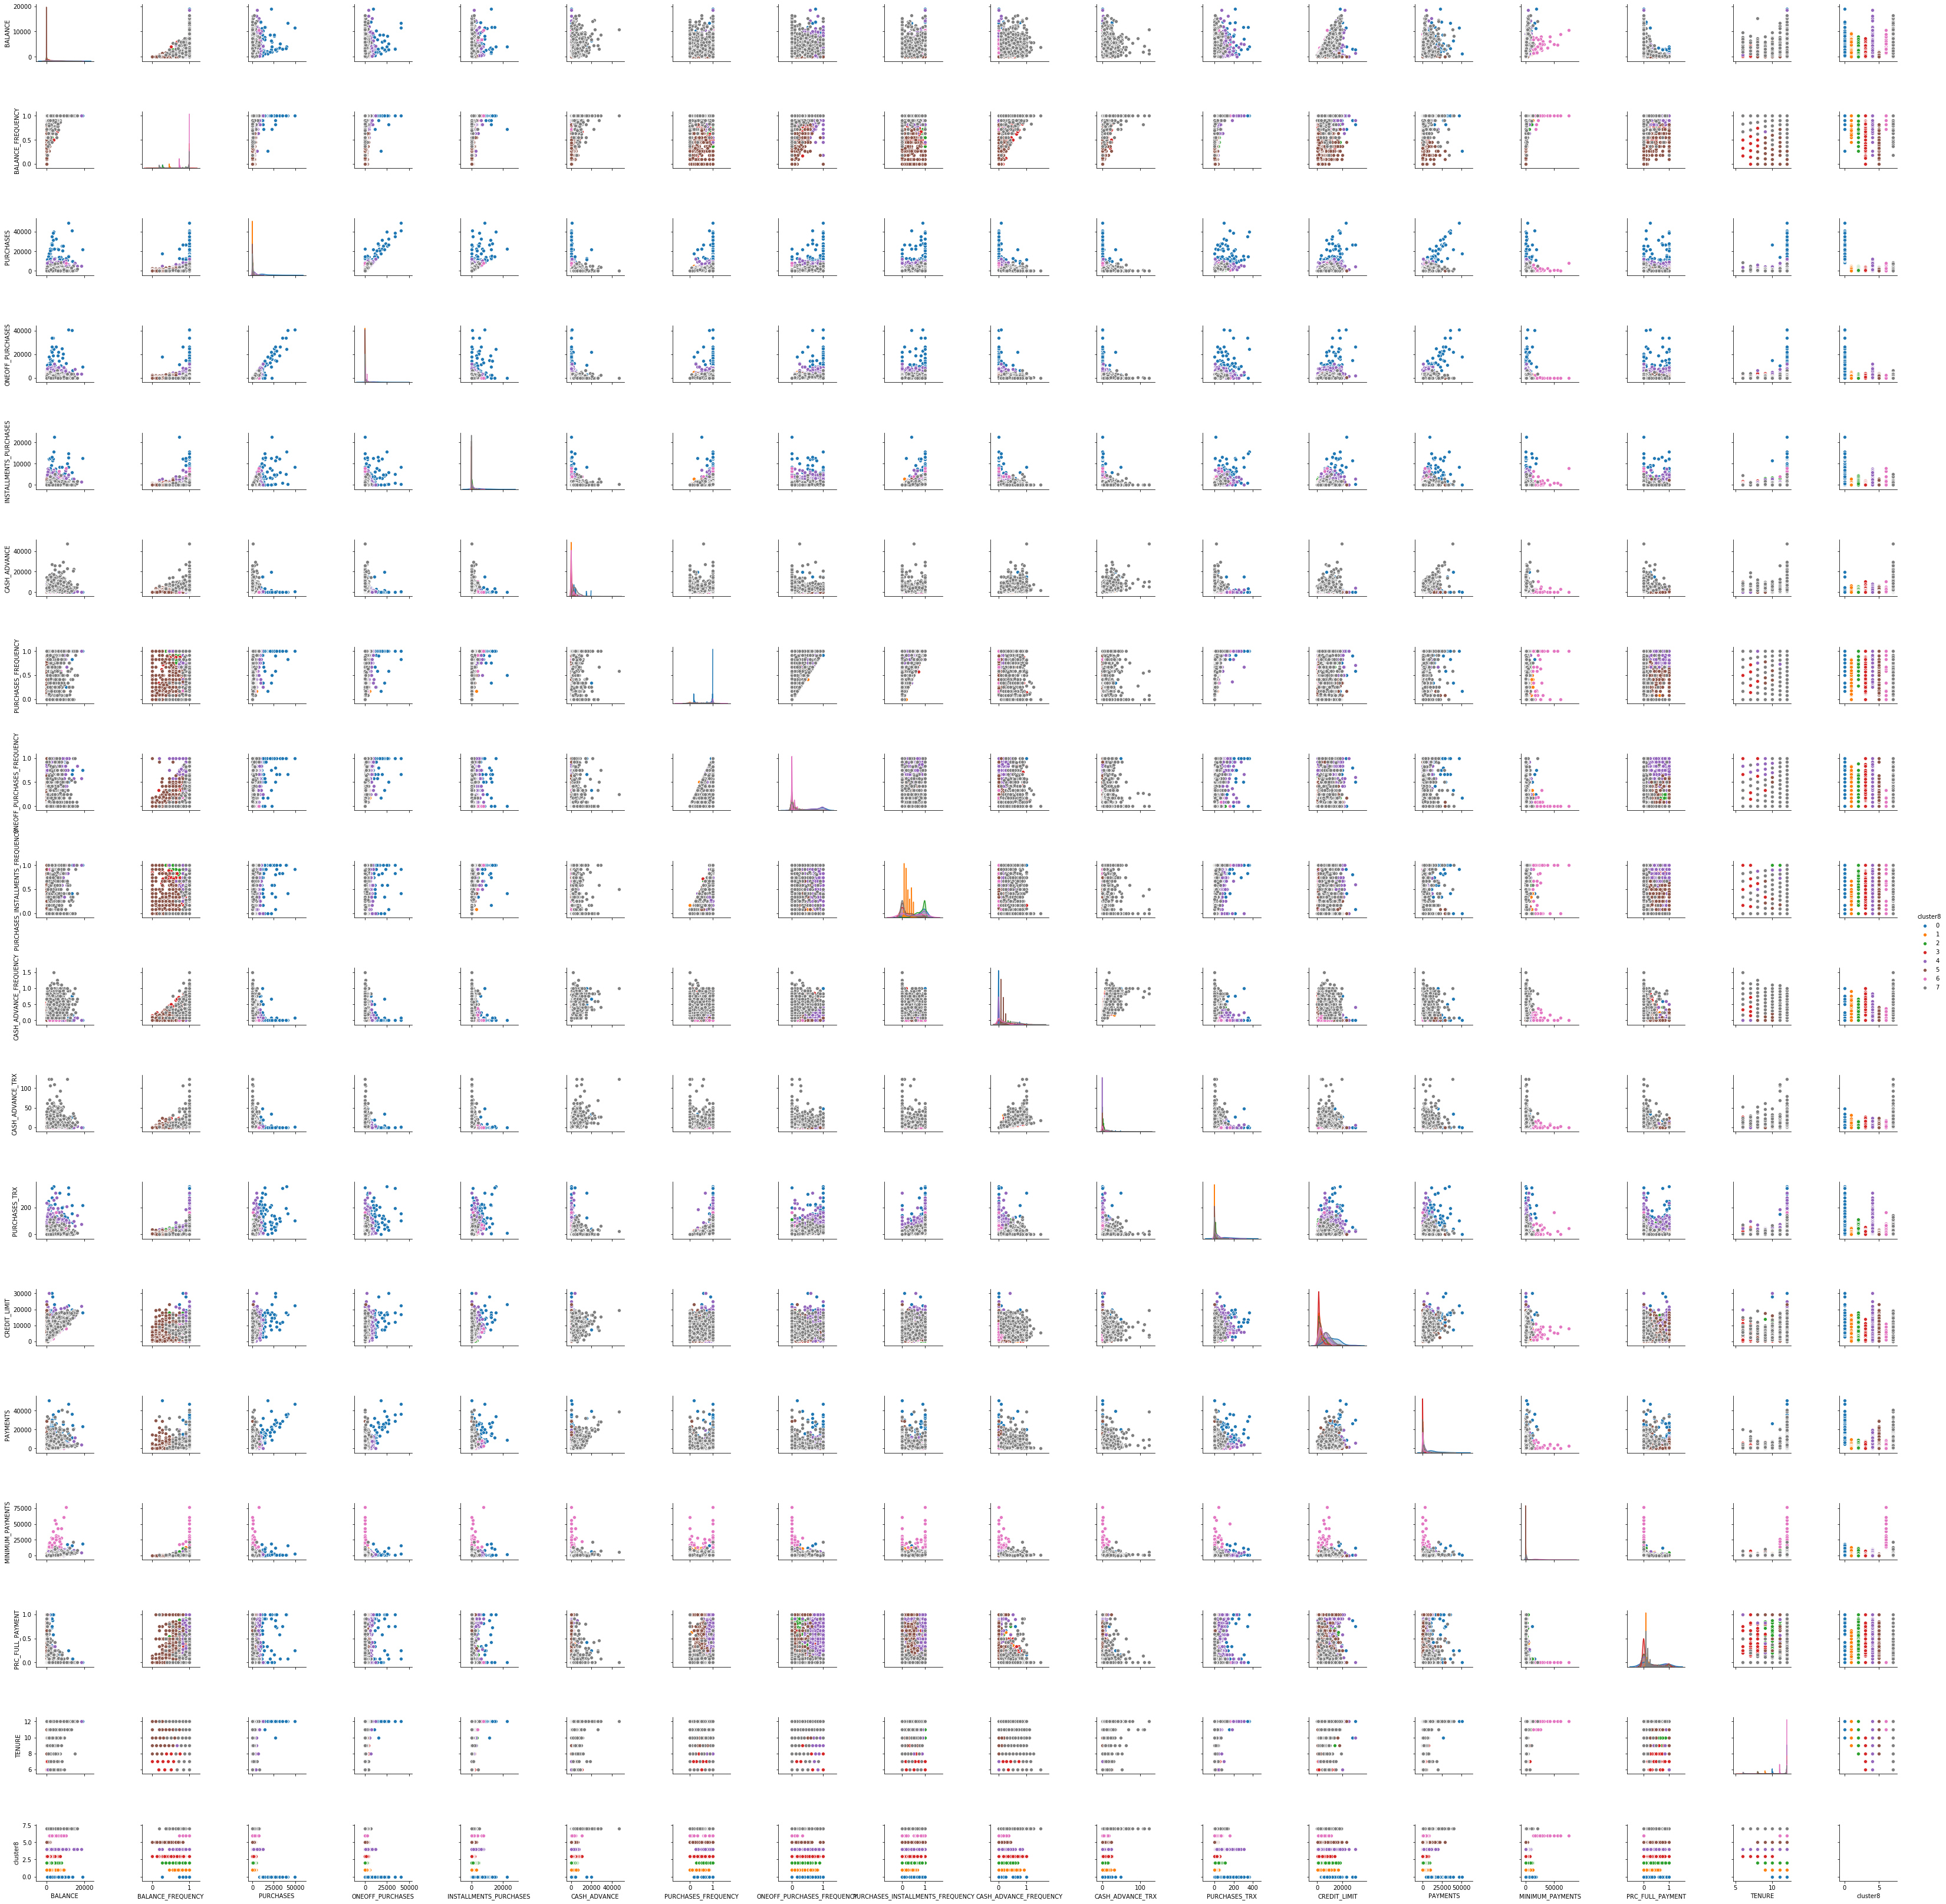

In [19]:
import seaborn as sns


plt.figure(figsize=(30,30))
sns.pairplot(clustered8, hue = 'cluster8')
plt.show;

The pairplots are very difficult to see when all columns are used, so it will be beneficial to choose the most informative columns. For the purposes of this analysis, `BALANCE`, `PURCHASES`, `CASH_ADVANCE`, `CREDIT_LIMIT`, `PAYMENTS`, and `MINIMUM_PAYMENTS` will be used.

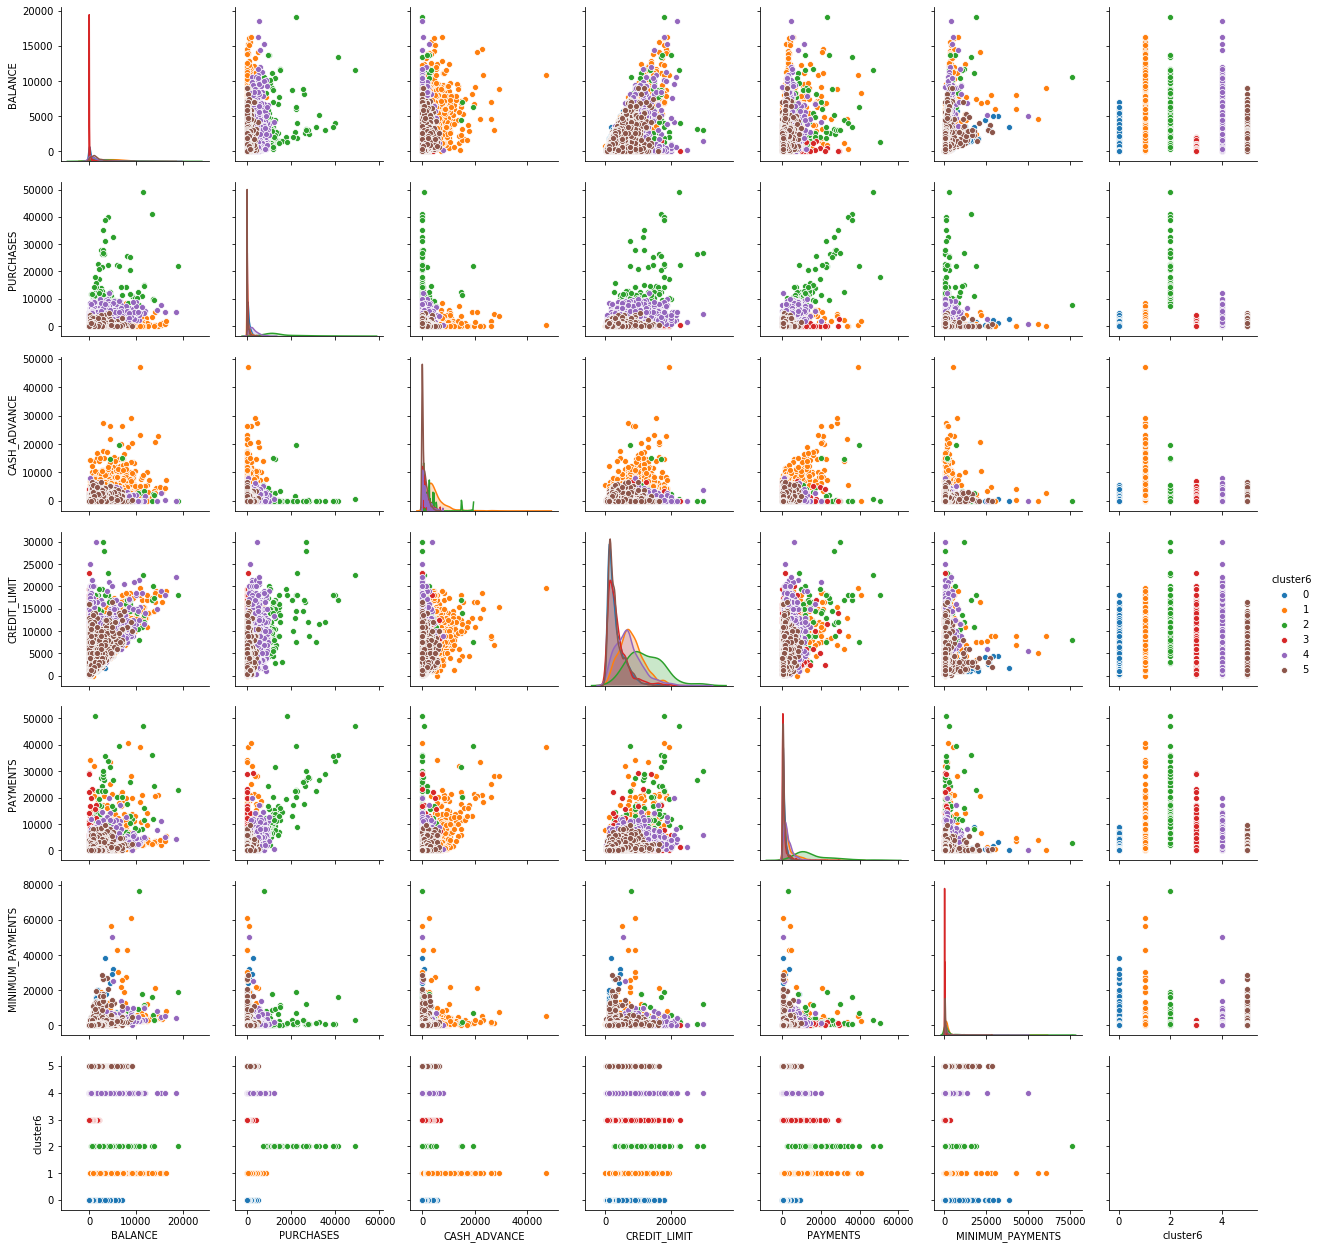

In [24]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","cluster6"]
sns.pairplot(clustered6[best_cols], hue="cluster6")

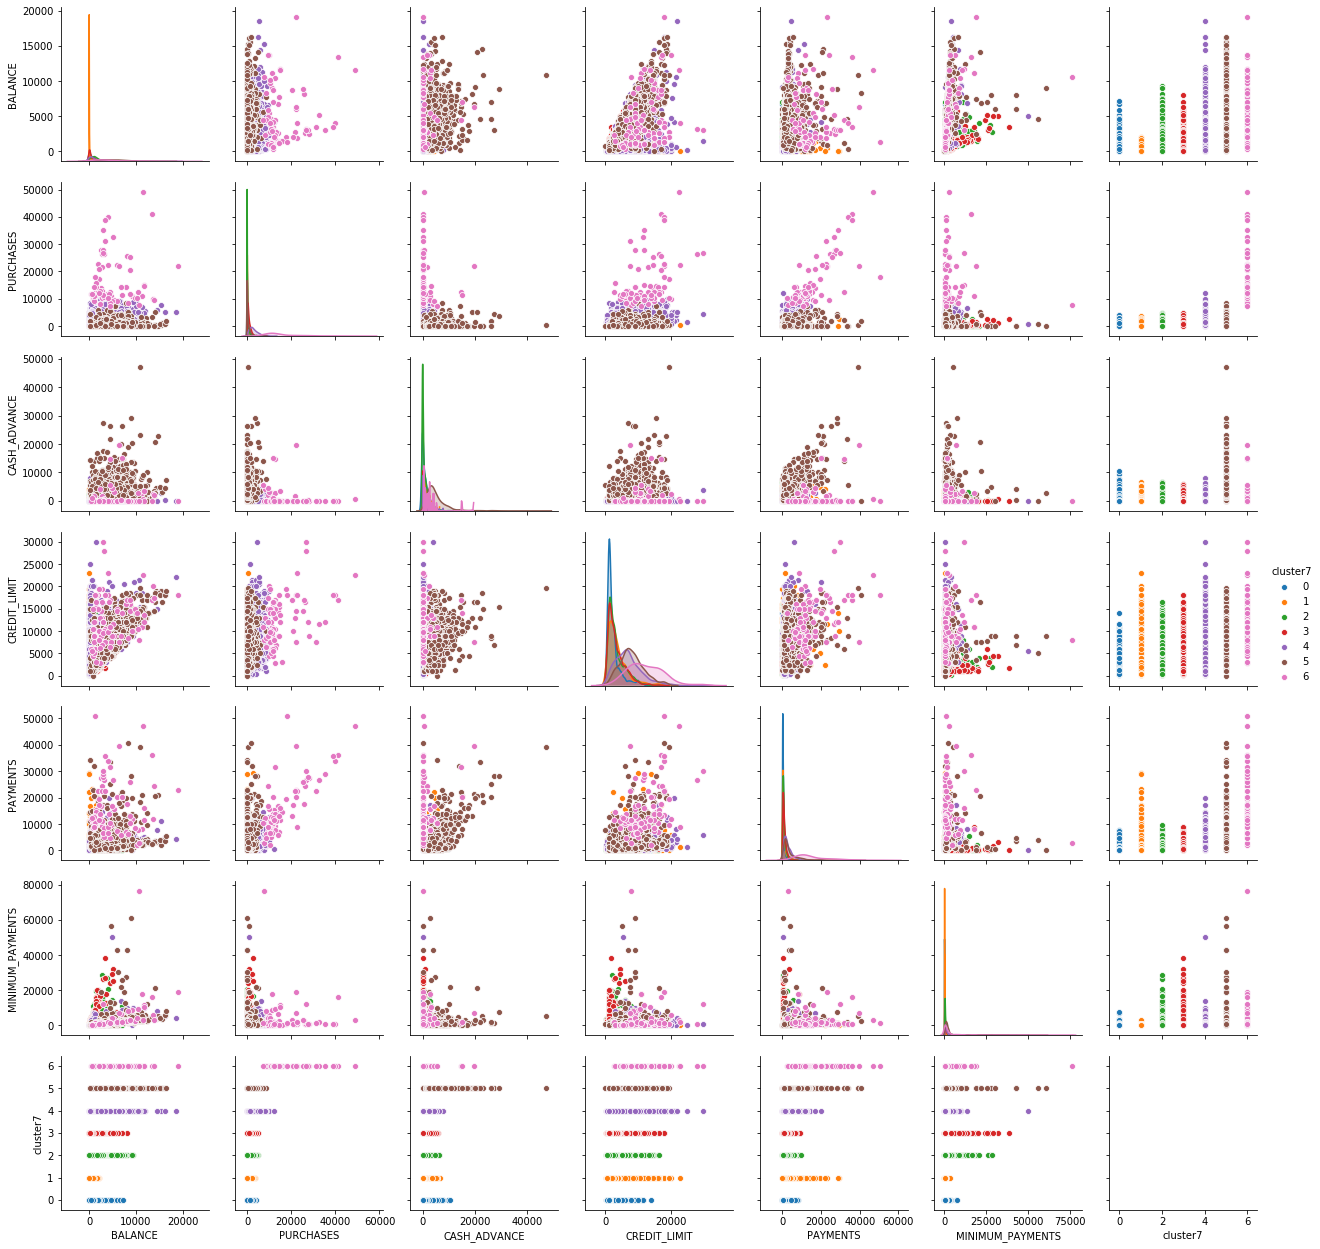

In [25]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","cluster7"]
sns.pairplot(clustered7[best_cols], hue="cluster7")

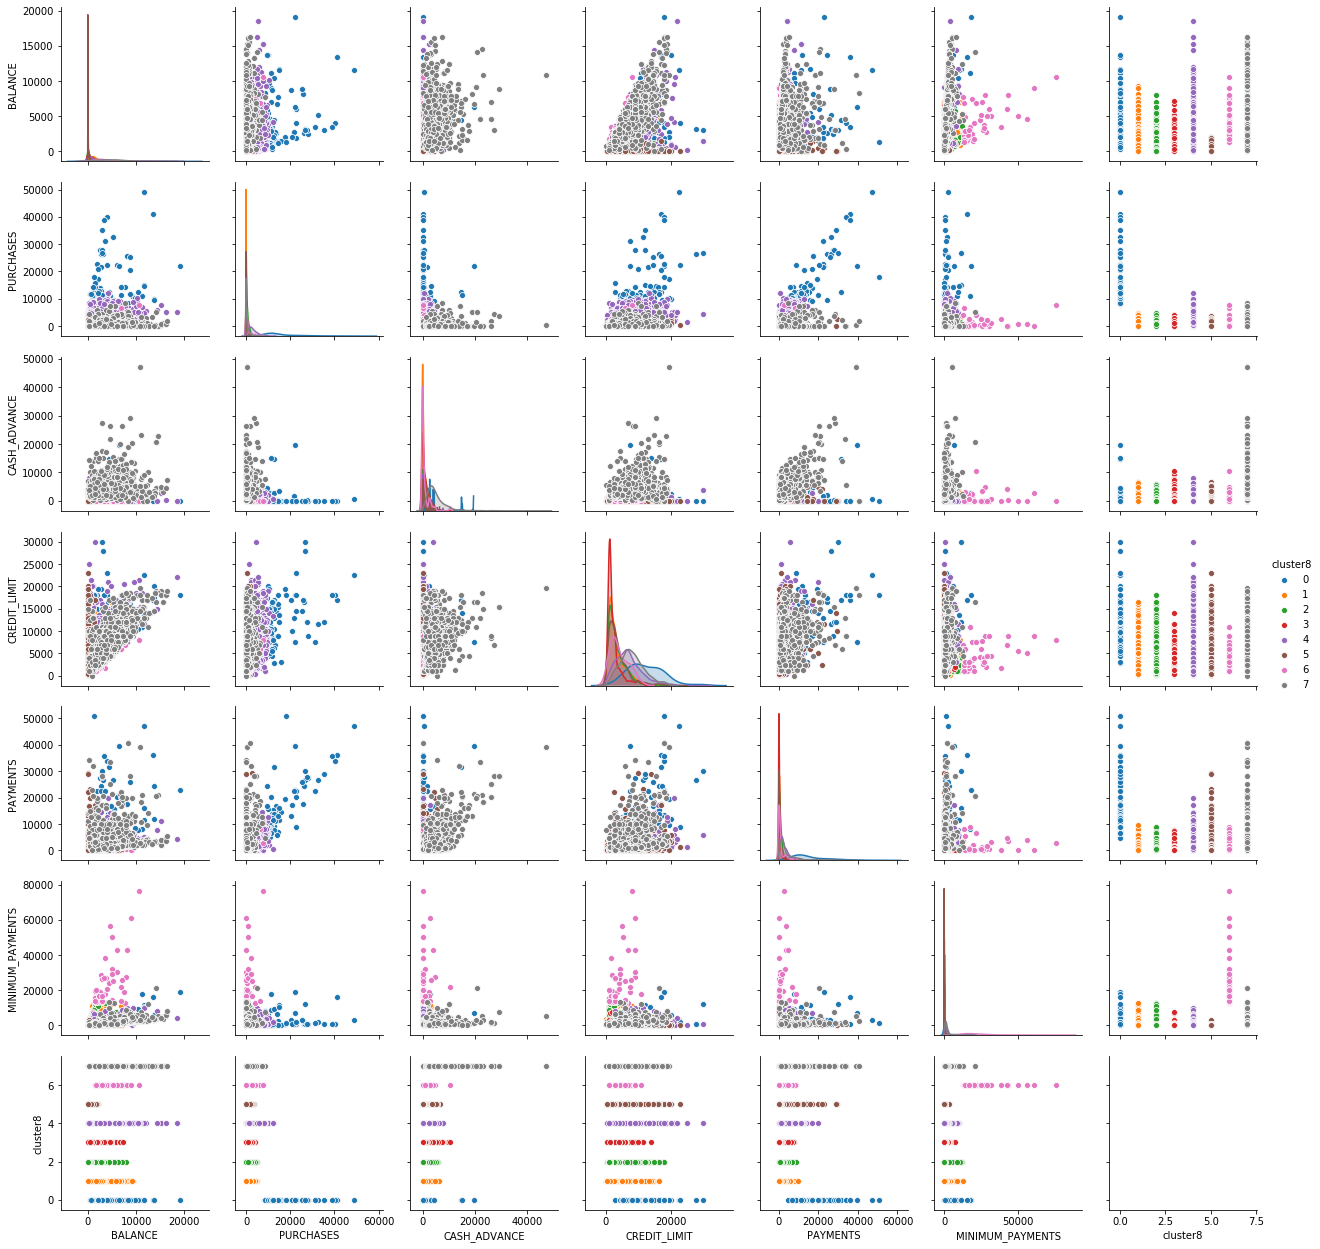

In [47]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","cluster8"]
sns.pairplot(clustered8[best_cols], hue="cluster8")

### Initial Conclusions

From the pairplots above, many conclusions can now be drawn.
- The same group that has the lowest `CREDIT_LIMIT`, also makes the lowest total `PURCHASES` and `PAYMENTS`
- The group with the lowest `BALANCE` also requests the least in `CASH_ADVANCE`s
- The group making the largest `PURCHASES` also requests the most in `CASH_ADVANCE`s
- The group with the highest `BALANCE` does not have highest `BALANCE` but does have the highest `MINIMUM_PAYMENT`

The data with outliers has now been successfully clustered, and conclusions have been drawn. It is time to see if employing a strategy for outliers changes the clustering and yields a better outcome.

In [27]:
from scipy.stats.mstats import winsorize

cc_data['wins_balance'] = winsorize(cc_data['BALANCE'],(0,.05))
cc_data['wins_purchases'] = winsorize(cc_data['PURCHASES'],(0,.05))
cc_data['wins_oneoff_purchases'] = winsorize(cc_data['ONEOFF_PURCHASES'],(0,.05))
cc_data['wins_installments_purchases'] = winsorize(cc_data['INSTALLMENTS_PURCHASES'],(0,.05))
cc_data['wins_cash_advance'] = winsorize(cc_data['CASH_ADVANCE'],(0,.05))
cc_data['wins_cash_advance_trx'] = winsorize(cc_data['CASH_ADVANCE_TRX'],(0,.05))
cc_data['wins_purchases_trx'] = winsorize(cc_data['PURCHASES_TRX'],(0,.05))
cc_data['wins_payments'] = winsorize(cc_data['PAYMENTS'],(0,.05))
cc_data['wins_minimum_payments'] = winsorize(cc_data['MINIMUM_PAYMENTS'],(0,.05))

The amount of outliers in the most extreme columns has been reduced. It is now time to implement the same algorithms as before to see if performance has changed.

In [28]:
wins_X = cc_data
wins_X = wins_X.drop(['CUST_ID','BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','PAYMENTS','MINIMUM_PAYMENTS'],axis=1)
wins_X.head()

BALANCE_FREQUENCY  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0           0.818182             0.166667                    0.000000   
1           0.909091             0.000000                    0.000000   
2           1.000000             1.000000                    1.000000   
3           0.636364             0.083333                    0.083333   
4           1.000000             0.083333                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CREDIT_LIMIT  \
0                          0.083333                0.000000        1000.0   
1                          0.000000                0.250000        7000.0   
2                          0.000000                0.000000        7500.0   
3                          0.000000                0.083333        7500.0   
4                          0.000000                0.000000        1200.0   

   PRC_FULL_PAYMENT  TENURE  wins_balance  wins_purchases  \
0          0.000000      12     40.900749           95.40   
1          0.222222      12   3202.467416            0.00   
2          0.000000      12   2495.148862          773.17   
3          0.000000      12   1666.670542         1499.00   
4          0.000000      12    817.714335           16.00   

   wins_oneoff_purchases  wins_installments_purchases  wins_cash_advance  \
0                   0.00                         95.4           0.000000   
1                   0.00                          0.0        4653.693195   
2                 773.17                          0.0           0.000000   
3                1499.00                          0.0         205.788017   
4                  16.00                          0.0           0.000000   

   wins_cash_advance_trx  wins_purchases_trx  wins_payments  \
0                      0                   2     201.802084   
1                      4                   0    4103.032597   
2                      0                  12     622.066742   
3                      1                   1       0.000000   
4                      0                   1     678.334763   

   wins_minimum_payments  
0             139.509787  
1            1072.340217  
2             627.284787  
3             312.343947  
4             244.791237

In [29]:
# Standarizing the features
scaler = StandardScaler()
wins_X_std = scaler.fit_transform(wins_X)

# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=4)

# Fit model
clusters = dbscan_cluster.fit_predict(wins_X_std)

print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: -0.4719669134146654


DBSCAN now performs worse than it did when outliers were still present.

Moving onto KMeans, an elbow graph will be constructed to determine the optimal cluster values.

In [30]:
clusters = 30
inertias = []
for i in range(1, clusters):
    kmean= KMeans(n_clusters = i, random_state = 123)
    kmean.fit(wins_X_std)
    inertias.append(kmean.inertia_)

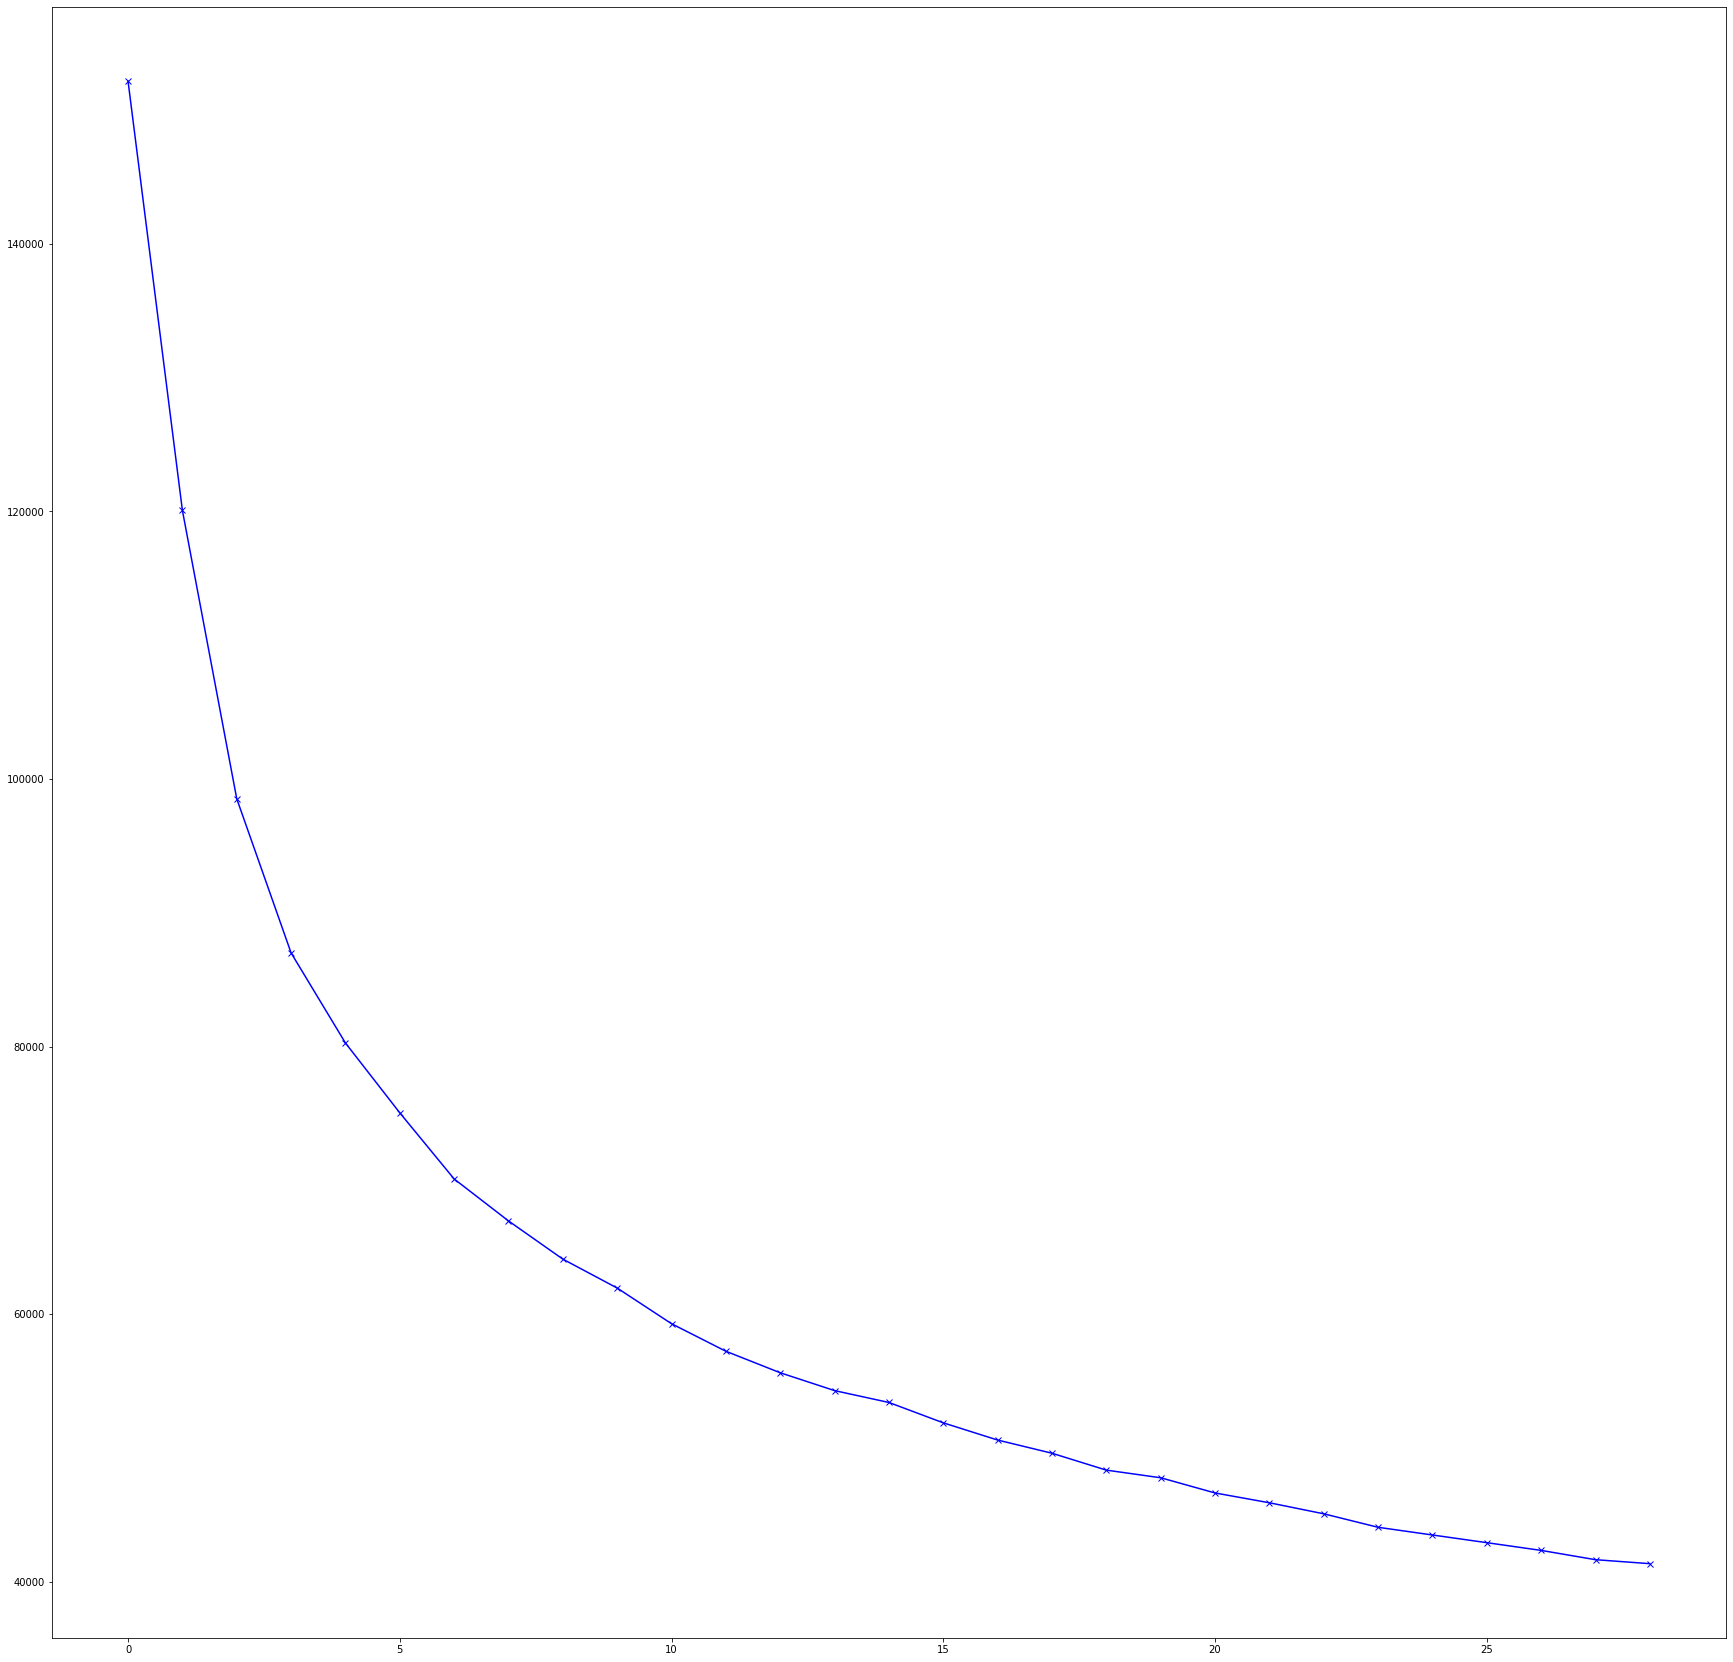

In [31]:
plt.figure(figsize = (30,30))
plt.plot(inertias, 'bx-')
plt.show();

From the above graph, it still appears that 6, 7, and 8 cluster solutions will be optimal.

In [32]:
wins_cluster6 = KMeans(n_clusters=6, random_state=123).fit_predict(wins_X_std)
wins_cluster7 = KMeans(n_clusters=7, random_state=123).fit_predict(wins_X_std)
wins_cluster8 = KMeans(n_clusters=8, random_state=123).fit_predict(wins_X_std)

print(metrics.silhouette_score(wins_X_std, wins_cluster6, metric='euclidean'))
print(metrics.silhouette_score(wins_X_std, wins_cluster7, metric='euclidean'))
print(metrics.silhouette_score(wins_X_std, wins_cluster8, metric='euclidean'))

0.19941809684414064
0.2092891199365986
0.1990929993799057


With outliers removed, the silhouette scores are slightly lower than they were initially, and it would appear that a 7-cluster solution is optimal. The lower silhouette scores make sense from the definition of silhouette scores: now that fewer outliers are present, the data itself will be more tightly packed, meaning that all clusters will be closer to one another.

In [33]:
cluster_scores = []

for i in range(2,20):
    gmm_cluster = GaussianMixture(n_components=i, random_state=123)
    clusters = gmm_cluster.fit_predict(wins_X_std)
    cluster_scores.append(metrics.silhouette_score(wins_X_std, clusters, metric='euclidean'))

In [34]:
for i in range(len(cluster_scores)):
    print(f'Silhouette score for {i+2} components: {cluster_scores[i]}')

Silhouette score for 2 components: 0.2216133730484199
Silhouette score for 3 components: 0.1189860372551245
Silhouette score for 4 components: 0.11704080271363972
Silhouette score for 5 components: 0.07903873984001648
Silhouette score for 6 components: 0.03710579756930762
Silhouette score for 7 components: 0.040690651419952574
Silhouette score for 8 components: 0.026222498273446047
Silhouette score for 9 components: 0.013954400448200217
Silhouette score for 10 components: 0.02730689963917119
Silhouette score for 11 components: 0.024994219794903277
Silhouette score for 12 components: 0.022834709330879454
Silhouette score for 13 components: 0.01836350443280925
Silhouette score for 14 components: 0.0019902039823647805
Silhouette score for 15 components: -0.001404587745284499
Silhouette score for 16 components: -0.0017278241217510923
Silhouette score for 17 components: -0.004785076910900371
Silhouette score for 18 components: -0.013315402052598202
Silhouette score for 19 components: -0.006

As before, GMM yields the highest silhouette score at just two components; all other scores are lower. KMeans is still outperforming the other algorithms.

In [35]:
wins_clustered8=pd.concat([wins_X, pd.DataFrame({'wins_cluster8':wins_cluster8})], axis=1)
wins_clustered7=pd.concat([wins_X, pd.DataFrame({'wins_cluster7':wins_cluster7})], axis=1)
wins_clustered6=pd.concat([wins_X, pd.DataFrame({'wins_cluster6':wins_cluster6})], axis=1)
wins_clustered8.head()

BALANCE_FREQUENCY  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0           0.818182             0.166667                    0.000000   
1           0.909091             0.000000                    0.000000   
2           1.000000             1.000000                    1.000000   
3           0.636364             0.083333                    0.083333   
4           1.000000             0.083333                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CREDIT_LIMIT  \
0                          0.083333                0.000000        1000.0   
1                          0.000000                0.250000        7000.0   
2                          0.000000                0.000000        7500.0   
3                          0.000000                0.083333        7500.0   
4                          0.000000                0.000000        1200.0   

   PRC_FULL_PAYMENT  TENURE  wins_balance  wins_purchases  \
0          0.000000      12     40.900749           95.40   
1          0.222222      12   3202.467416            0.00   
2          0.000000      12   2495.148862          773.17   
3          0.000000      12   1666.670542         1499.00   
4          0.000000      12    817.714335           16.00   

   wins_oneoff_purchases  wins_installments_purchases  wins_cash_advance  \
0                   0.00                         95.4           0.000000   
1                   0.00                          0.0        4653.693195   
2                 773.17                          0.0           0.000000   
3                1499.00                          0.0         205.788017   
4                  16.00                          0.0           0.000000   

   wins_cash_advance_trx  wins_purchases_trx  wins_payments  \
0                      0                   2     201.802084   
1                      4                   0    4103.032597   
2                      0                  12     622.066742   
3                      1                   1       0.000000   
4                      0                   1     678.334763   

   wins_minimum_payments  wins_cluster8  
0             139.509787              1  
1            1072.340217              2  
2             627.284787              0  
3             312.343947              1  
4             244.791237              1

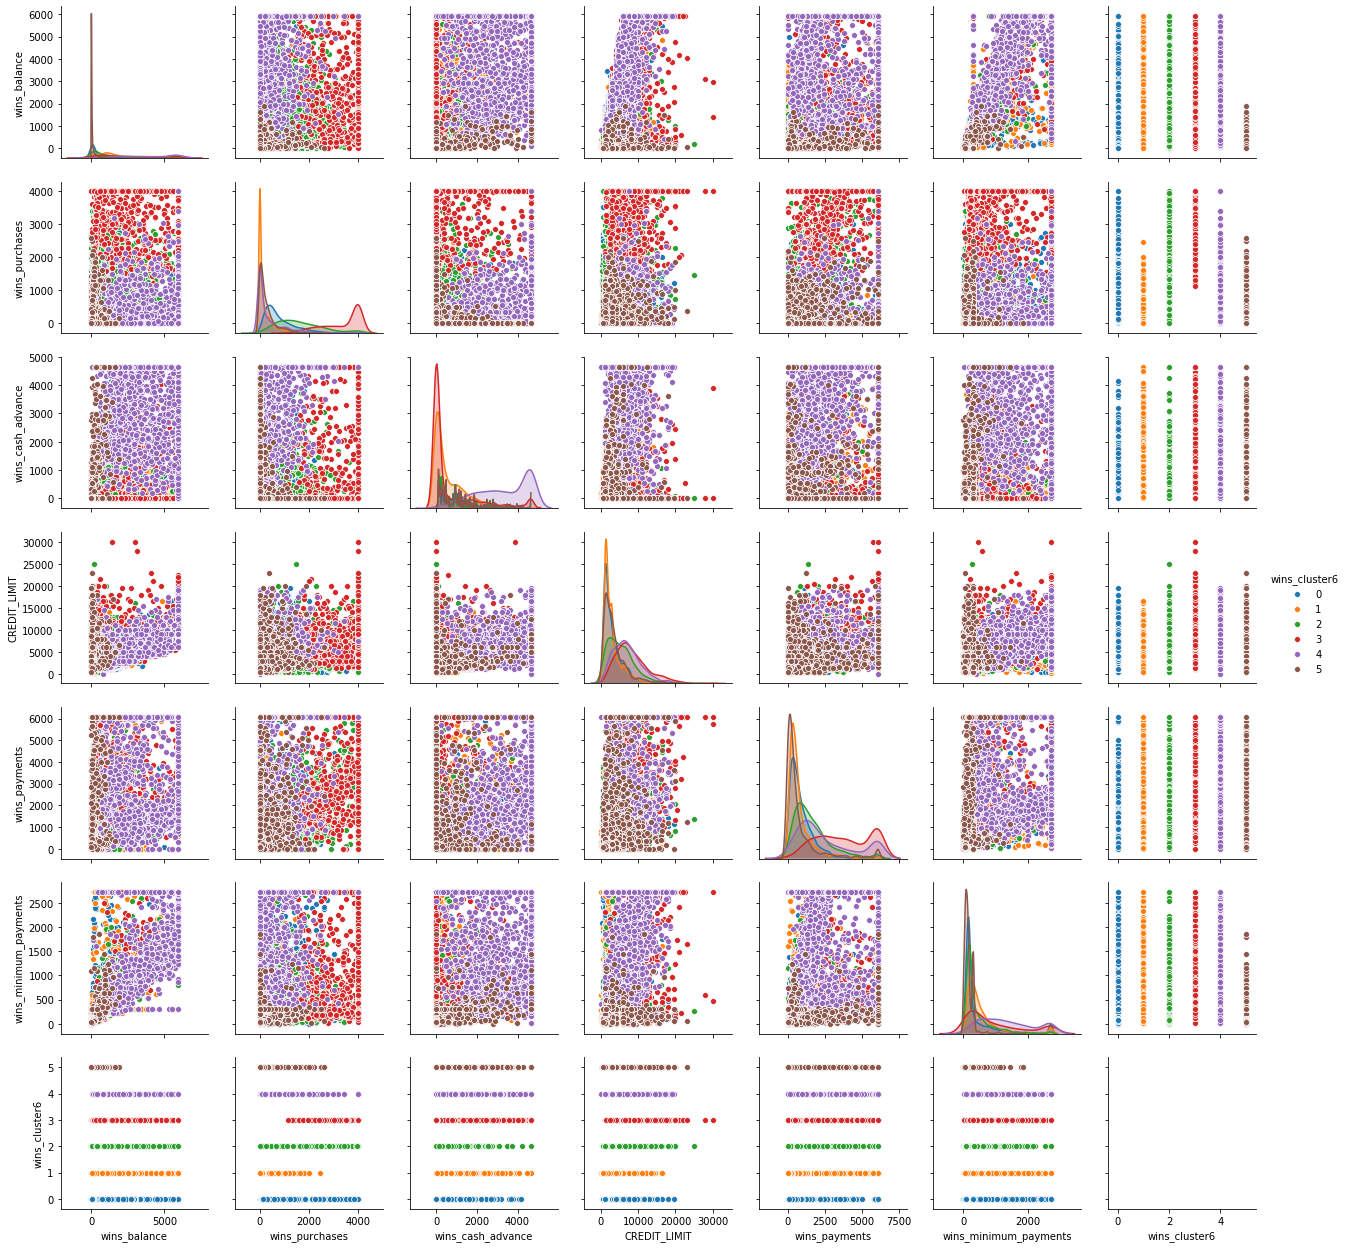

In [37]:
best_cols = ["wins_balance", "wins_purchases", "wins_cash_advance","CREDIT_LIMIT", "wins_payments", "wins_minimum_payments","wins_cluster6"]
sns.pairplot(wins_clustered6[best_cols], hue="wins_cluster6")

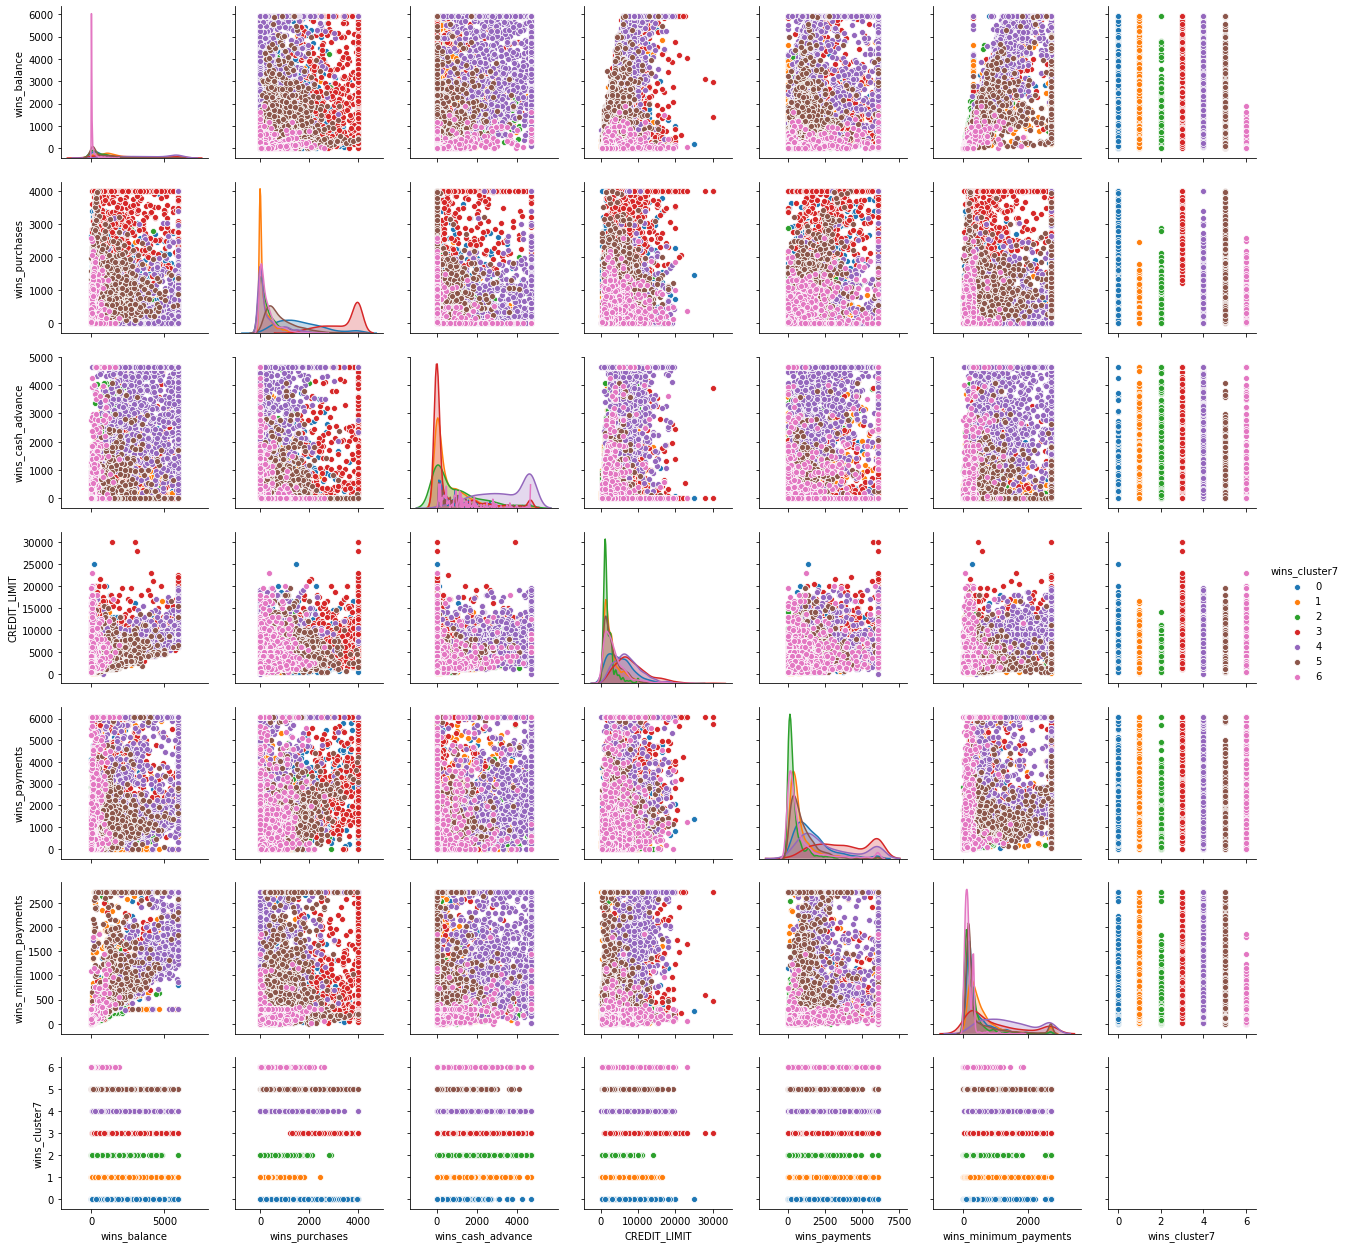

In [38]:
best_cols = ["wins_balance", "wins_purchases", "wins_cash_advance","CREDIT_LIMIT", "wins_payments", "wins_minimum_payments","wins_cluster7"]
sns.pairplot(wins_clustered7[best_cols], hue="wins_cluster7")

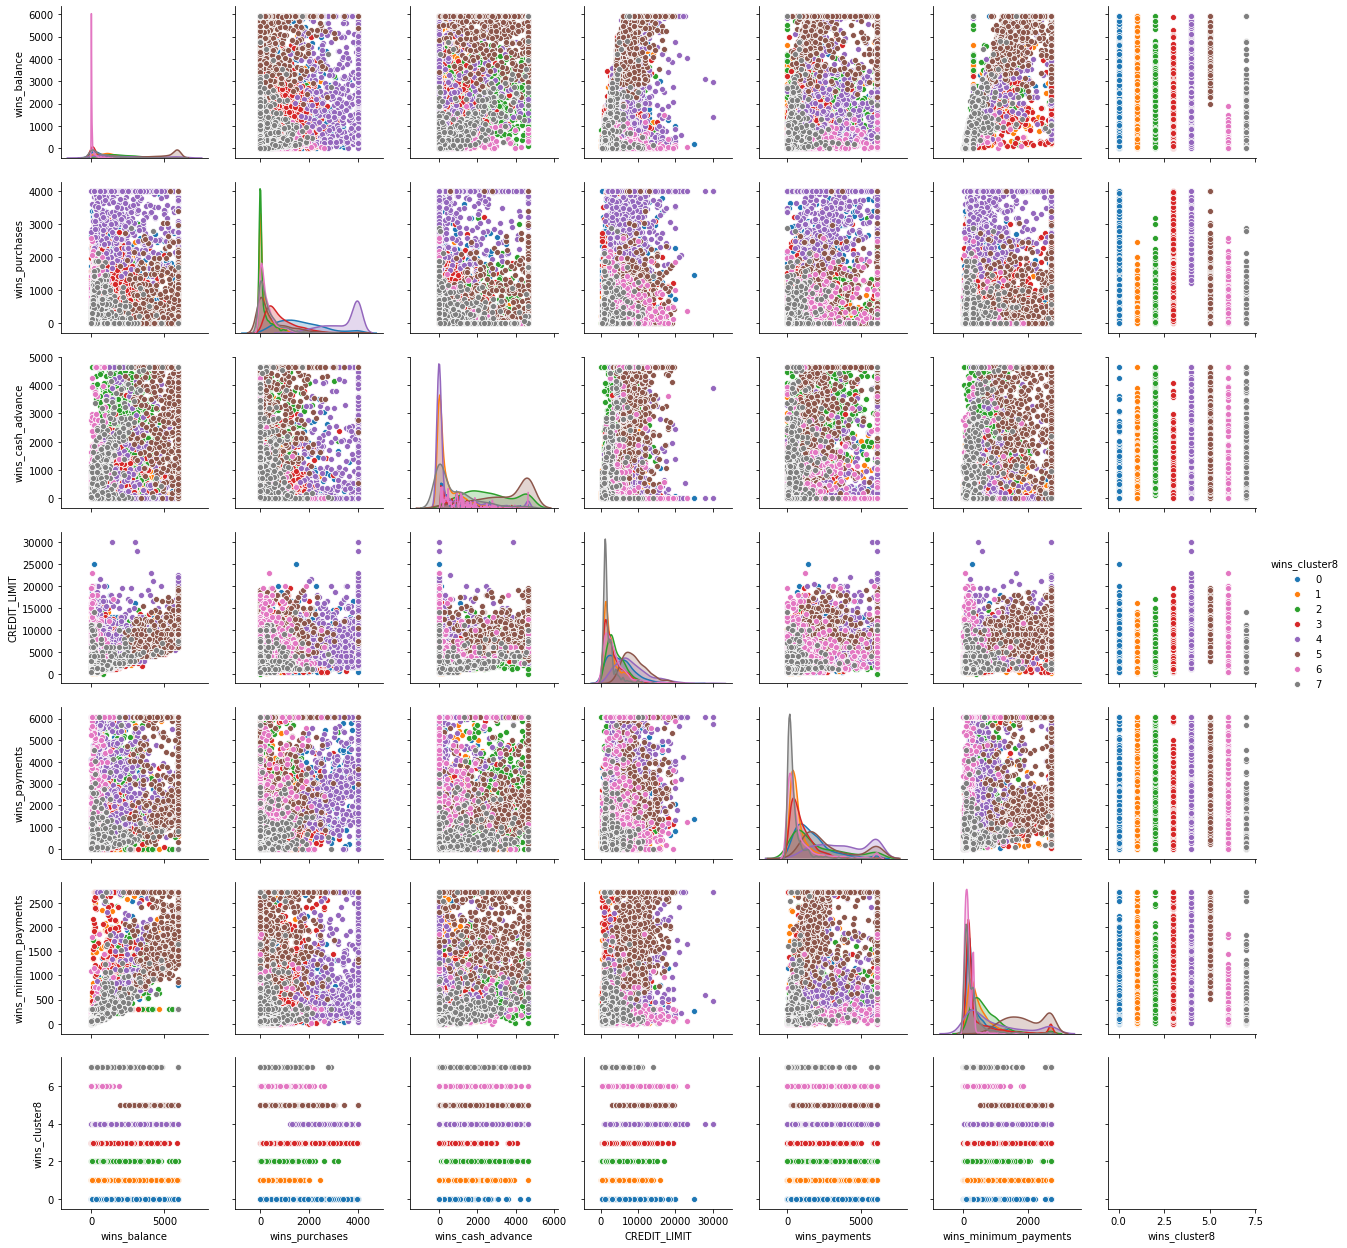

In [36]:
best_cols = ["wins_balance", "wins_purchases", "wins_cash_advance","CREDIT_LIMIT", "wins_payments", "wins_minimum_payments","wins_cluster8"]
sns.pairplot(wins_clustered8[best_cols], hue="wins_cluster8")

### Conclusions from Winsorized Clusters

As with the last set of clusters, there are conclusions to be drawn from the above pairplots.

- The group with the highest `min_payments` also runs the highest `balance`
- The group with the highest `credit_limit` also makes the highest `purchases`
- The group getting the most `cash_advance`s is not making the most purchases and is making a relatively low amount of `purchase`s
- The groups with lower `CREDIT_LIMIT`s are also generally making lower `payments` and `minimum_payments`

### Why does this work matter?

Now that all the work has been done and conclusions have been drawn, it is important to ask why any of this work matters and who would possibly care about it. The obvious answer for who would care is credit card companies. When extending credit to a new customer, looking at old habits is important. Similarly, when wanting to learn about current customers, similar analysis will be done to discover trends in their user base.

Outside of credit card companies, people interested in helping others budget and manage debt would be interested in this work because it would help them identify groups of people who may need assistance. Cardholders requesting many cash advances with low balances are likely an at-risk sector and would benefit from outside assistance. Identifying such groups can be done with the type of analysis done in this project.

### Model Shortcomings

In this dataset, there were no ground truths, so the only metric available for determining model performance directly is silhouette score. After visualization, it does appear that the clusters provided good information, but there is no way of knowing if it is the right information. With ground truths, there is an objective metric with which model performance can be compared (ARI score), but here, no such metric is available.

Additionally, the `TENURE` feature only ranges from 6 months to 12 months, meaning that the only credit patterns available are those from a very short timespan. It would be nice to have longer timespans available, as those would likely provide more robust information about cardholders' behavior.

Another feature that would be nice to have would be credit score for each cardholder. Although this would likely change the nature of the dataset from unsupervised to supervised, having more information is never a bad thing.

### Further Work

The next step after this project would be for the credit card company to take the user groups and make predictions regarding defaults and credit scores within clusters. Although this dataset does not have information regarding credit defaults and scores, comparing it to another group of cardholders would allow mapping of credit scores and default probabilities.

For parties other than credit card companies, the clusters provide information regarding spending and credit habits and can be used to assist with budgeting. Looking into the group taking out many cash advances is a good starting point, as taking cash advances from credit card companies is never a good idea. Determining a way to eliminate or reduce reliance on such advance would be an excellent way to assist people who are in need of budget help.